**資科工碩 0756110 李東霖**

# Introduction


In this lab, we need to implement NN and back propagation

Some request:

- Write a simple neural networks without framework (e.g. Tensorflow, PyTorch)
- Only use Numpy and other standard lib
- NN with two hidden layers
- Plot your comparison figure that show the predict result and ground truth

## Implementation

- $X$,$y$ : Data
- $x_1$,$x_2$ : NN inputs
- $\hat{y}$ : NN output
- $L(\theta)$ : Lost function (MSE $E(|\hat{y} - y|^2)$)
- $W$ : weight matrix
- $\sigma$ : activation function (sigmoid $\frac{1}{1+e^{-x}}$)

In [1]:
%run lab1.py
# run my code like cell code

## Dataset

We have two data generator

- Linear
- XOR

Target y is 0 or 1, just like one class classification.

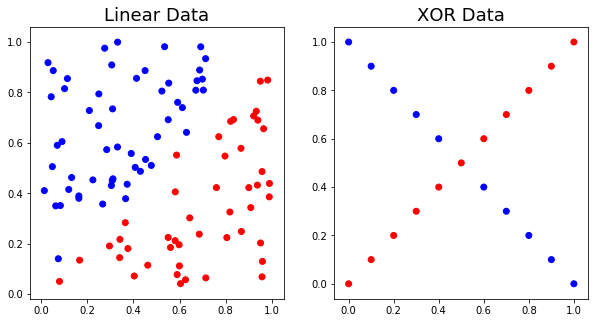

In [2]:
x1, y1 = generate_linear()
x2, y2 = generate_XOR_easy()
show_data([x1,x2], [y1,y2], ['Linear Data', 'XOR Data'])

# Experiment setups

## Sigmoid functions

## Neural network

### Neural Unit

Our input $x$ vector get output $y$ vector through neural unit 

$z=w^Tx+b, y=\sigma(z)$

## Backpropagation

In [3]:
nn = NN([2,4,4,1], 0.01)

In [4]:
epoch_count = 10000
epoch_size = 1000
batch_size = 1000
loss_threshold = 0.01
loss_stop = False
x, y = generate_XOR_easy(int(epoch_size/2)+1)
for i in range(epoch_count):
    loss_total = 0
    n = int(epoch_size / batch_size)
    for j in range(n):
        cur_x = x[j*batch_size:(j+1)*batch_size]
        cur_y = y[j*batch_size:(j+1)*batch_size]
        pred_y = nn.forward(cur_x)
        
        l = loss(pred_y , cur_y)
        loss_total += l
        
        nn.backward(derivative_loss(pred_y, cur_y))
        nn.update()
    
    if loss_total < loss_threshold:
        loss_stop = True
    if i%1000 == 0 or loss_stop:
        print('[{:6d}] loss : {}'.format(i, loss_total))        
    if loss_stop:
        break

[     0] loss : 0.4066744309169176
[  1000] loss : 0.25006260692645216
[  2000] loss : 0.24998360673924302
[  3000] loss : 0.24998330654153467
[  4000] loss : 0.24998300897456407
[  5000] loss : 0.24998271110622017
[  6000] loss : 0.24998241292965248
[  7000] loss : 0.24998211443810606
[  8000] loss : 0.24998181562481278
[  9000] loss : 0.24998151648299066


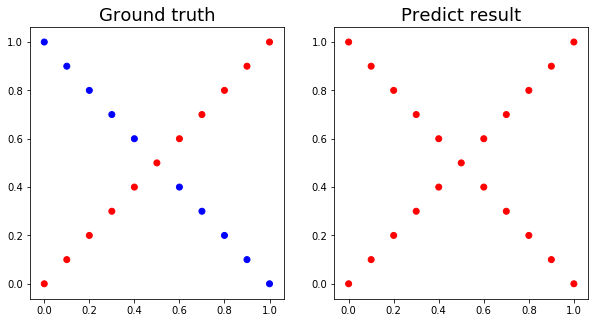

0.24994504726756003


In [5]:
x, y = generate_XOR_easy(10+1)
pred_y = nn.forward(x)
show_result(x, y, np.round(pred_y))
print(loss(pred_y, y))